# Denoising Experiements
- Spatial, branching, with no location channels
- Noise = 0.8, 0.9, 0.95

In [1]:
# Torch
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch import optim 


# Train + Data 
import sys 
sys.path.append('../Layers')
from Conv1d_NN import *
from Conv2d_NN import *

from Conv1d_NN_spatial import * 
from Conv2d_NN_spatial import * 

sys.path.append('../Data')
from CIFAR10 import CIFAR10_denoise, test_denoise_visual

sys.path.append('../Models')
from models_2d import *


sys.path.append('../Train')
from train2d import * 


/Users/mingikang/miniforge3/envs/ML/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### i. Data

In [2]:
cifar10_8 = CIFAR10_denoise(noise_std=.8)
cifar10_9 = CIFAR10_denoise(noise_std=.9)
cifar10_95 = CIFAR10_denoise(noise_std=.95)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


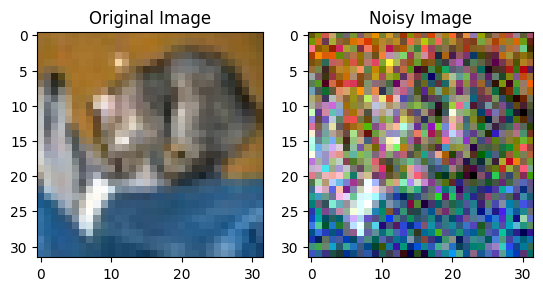

In [3]:
cifar10_8.visual()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


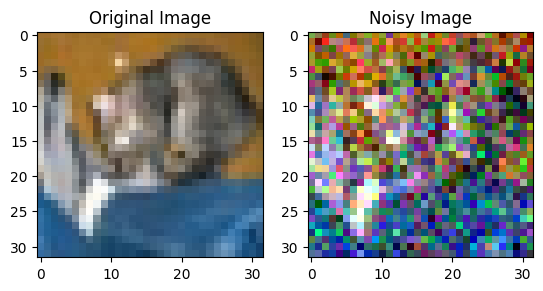

In [4]:
cifar10_9.visual()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


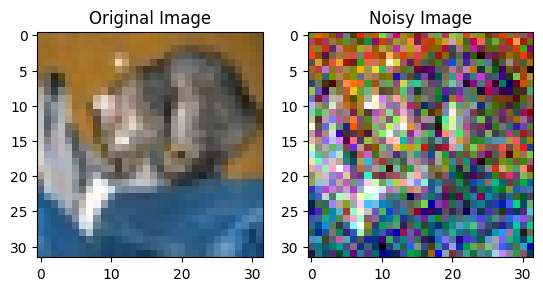

In [5]:
cifar10_95.visual()

### ii. Model Experiments for Noise = 0.8

Epoch 1, Time: 9.31598711013794, Loss: 0.1263399733435315
Epoch 2, Time: 8.428905963897705, Loss: 0.08377078346088719
Epoch 3, Time: 8.303515195846558, Loss: 0.0800359037888172
Epoch 4, Time: 8.41932487487793, Loss: 0.07795862886873657
Epoch 5, Time: 9.416587114334106, Loss: 0.07670910463994726
Epoch 6, Time: 9.434621095657349, Loss: 0.07589875495113681
Epoch 7, Time: 8.627832889556885, Loss: 0.07533891722941033
Epoch 8, Time: 8.28507113456726, Loss: 0.07477756027522904
Epoch 9, Time: 8.390683889389038, Loss: 0.07431174043918509
Epoch 10, Time: 8.53020691871643, Loss: 0.07386468530958876

 Average epoch time: 8.71527361869812
Average loss on test set: 0.07359376692088546


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 11.33556796638829


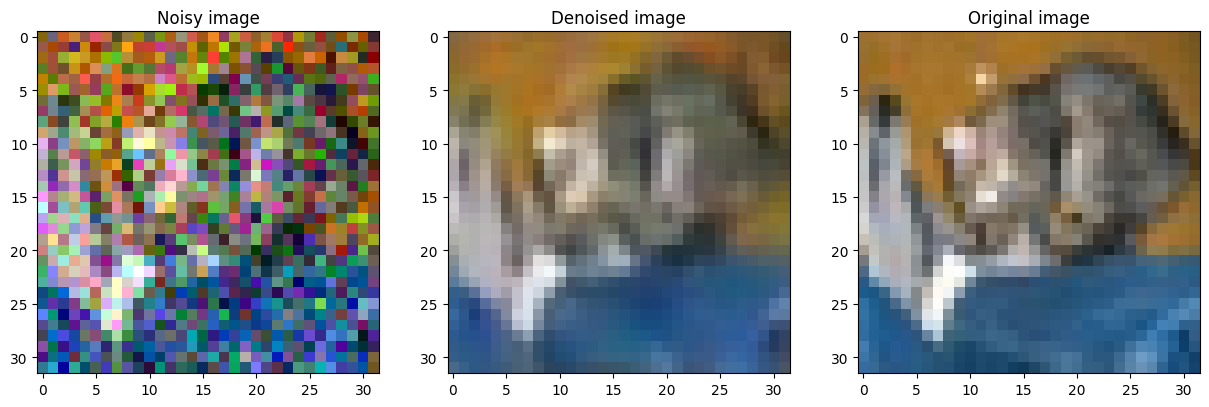

In [6]:
# CNN control model 
CNN = DenoisingCNN()

criterion = nn.MSELoss()
optimizer = optim.Adam(CNN.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(CNN, cifar10_8.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(CNN, cifar10_8.test_loader, criterion)
evaluate_accuracy_psnr(CNN, cifar10_8.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(CNN, cifar10_8.test_loader)


Epoch 1, Time: 78.93386125564575, Loss: 0.16258020968655187
Epoch 2, Time: 78.1339750289917, Loss: 0.08222769846772904
Epoch 3, Time: 78.93915009498596, Loss: 0.07738502967693008
Epoch 4, Time: 78.65140414237976, Loss: 0.07526069158292792
Epoch 5, Time: 78.81250786781311, Loss: 0.07390967765084618
Epoch 6, Time: 80.81522107124329, Loss: 0.07299969794080995
Epoch 7, Time: 81.53365468978882, Loss: 0.07207338477644469
Epoch 8, Time: 81.70539593696594, Loss: 0.07151042788153719
Epoch 9, Time: 81.72663807868958, Loss: 0.07102150748224209
Epoch 10, Time: 81.2891137599945, Loss: 0.07056286145963937

 Average epoch time: 80.05409219264985
Average loss on test set: 0.07108350786244035


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 11.491082695639058


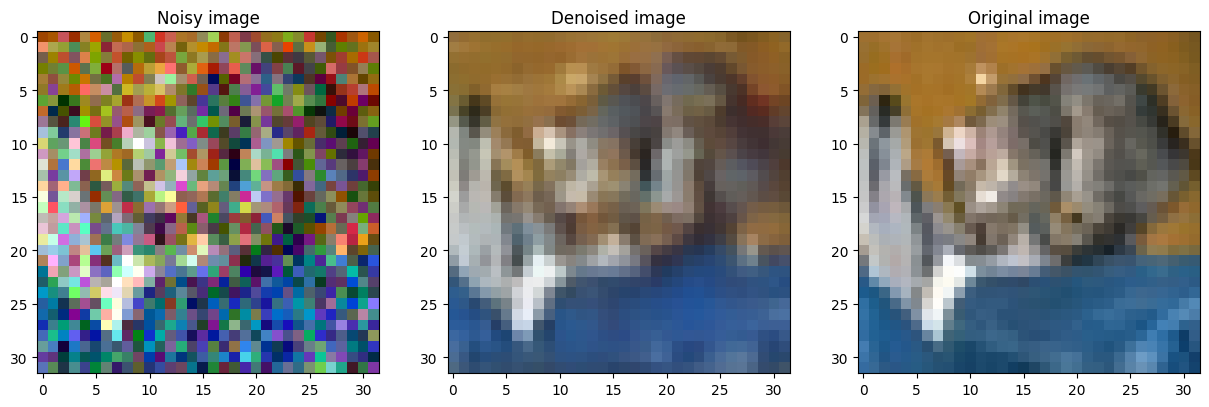

In [7]:
denoisingbranching_convNN_spatial_K_N_16_16 = DenoisingBranching_ConvNN_2D_Spatial_K_N()

criterion = nn.MSELoss()
optimizer = optim.Adam(denoisingbranching_convNN_spatial_K_N_16_16.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_8.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_8.test_loader, criterion)
evaluate_accuracy_psnr(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_8.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_8.test_loader)




Epoch 1, Time: 77.55117297172546, Loss: 0.20980999603524536
Epoch 2, Time: 82.12514305114746, Loss: 0.07875915169906433
Epoch 3, Time: 80.32326912879944, Loss: 0.07501558998547246
Epoch 4, Time: 79.84522581100464, Loss: 0.0731793136605064
Epoch 5, Time: 83.40547919273376, Loss: 0.07193471246477588
Epoch 6, Time: 78.19390678405762, Loss: 0.07098548491592602
Epoch 7, Time: 78.82223582267761, Loss: 0.07029745266165423
Epoch 8, Time: 79.85729598999023, Loss: 0.06979428512780257
Epoch 9, Time: 79.12414002418518, Loss: 0.06927973515999591
Epoch 10, Time: 79.22817206382751, Loss: 0.06889027498109872

 Average epoch time: 79.84760408401489
Average loss on test set: 0.0690231632654834


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 11.614094460845752


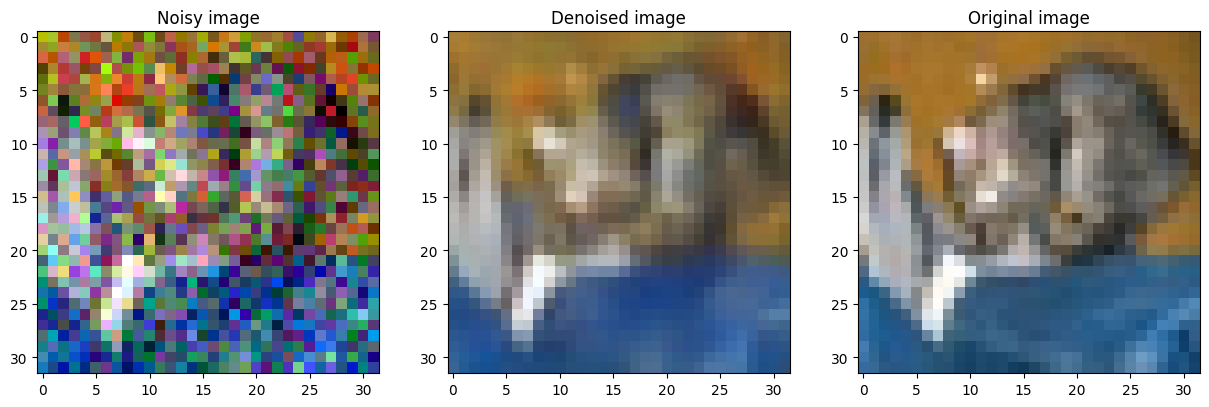

In [9]:
denoisingbranching_convNN_spatial_K_N_24_8 = DenoisingBranching_ConvNN_2D_Spatial_K_N(channel_ratio=(24,8))

criterion = nn.MSELoss()
optimizer = optim.Adam(denoisingbranching_convNN_spatial_K_N_24_8.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_8.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_8.test_loader, criterion)
evaluate_accuracy_psnr(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_8.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_8.test_loader)




### iii. Model Experiments for Noise = 0.9

Epoch 1, Time: 9.448899745941162, Loss: 0.13742578633682198
Epoch 2, Time: 9.015907049179077, Loss: 0.09418674625094285
Epoch 3, Time: 8.808963775634766, Loss: 0.0905196747702101
Epoch 4, Time: 8.716466903686523, Loss: 0.08856893793853653
Epoch 5, Time: 9.54847002029419, Loss: 0.08737102835951253
Epoch 6, Time: 9.283963918685913, Loss: 0.08650607216503005
Epoch 7, Time: 9.176057815551758, Loss: 0.08579272354769585
Epoch 8, Time: 9.307871103286743, Loss: 0.08527544489525773
Epoch 9, Time: 9.256160974502563, Loss: 0.08470087549875459
Epoch 10, Time: 9.34436583518982, Loss: 0.08437898615970636

 Average epoch time: 9.190712714195252
Average loss on test set: 0.08409981154332495


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 10.748877737932144


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


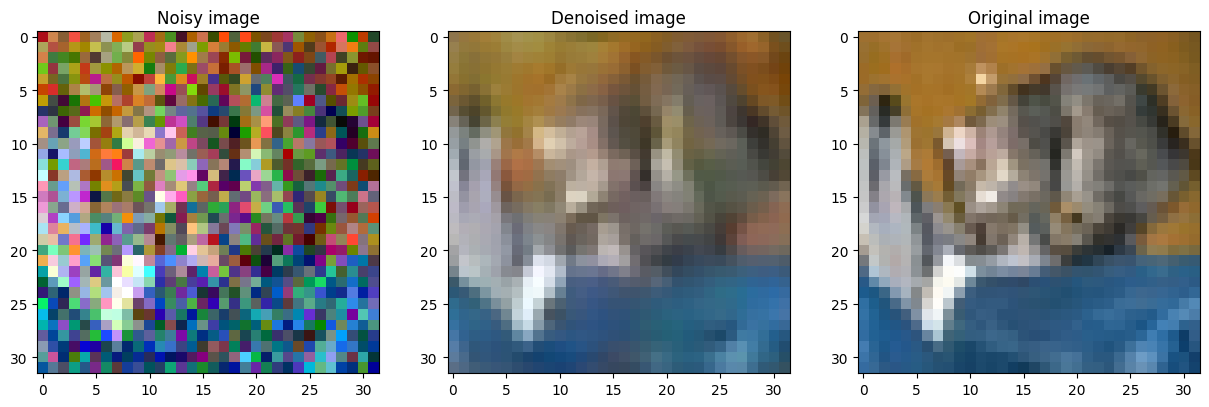

In [10]:
# CNN control model 
CNN = DenoisingCNN()

criterion = nn.MSELoss()
optimizer = optim.Adam(CNN.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(CNN, cifar10_9.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(CNN, cifar10_9.test_loader, criterion)
evaluate_accuracy_psnr(CNN, cifar10_9.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(CNN, cifar10_9.test_loader)


Epoch 1, Time: 80.20965909957886, Loss: 0.2121532637711681
Epoch 2, Time: 79.77349305152893, Loss: 0.09213800719746239
Epoch 3, Time: 79.48330688476562, Loss: 0.08644621731603847
Epoch 4, Time: 78.95167827606201, Loss: 0.0840464465491607
Epoch 5, Time: 79.3781168460846, Loss: 0.082542271031748
Epoch 6, Time: 77.51924681663513, Loss: 0.08156284637501478
Epoch 7, Time: 79.2017228603363, Loss: 0.08087383810897618
Epoch 8, Time: 78.28671216964722, Loss: 0.08030352713849843
Epoch 9, Time: 81.01222825050354, Loss: 0.07975947797831977
Epoch 10, Time: 78.8355758190155, Loss: 0.07921819577512838

 Average epoch time: 79.26517400741577
Average loss on test set: 0.07871755483044181


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 11.045020401098167


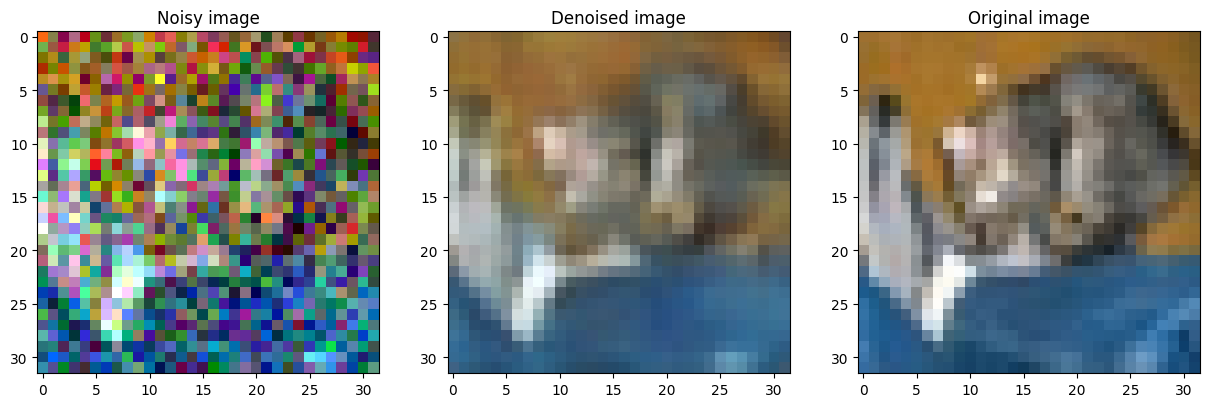

In [11]:
denoisingbranching_convNN_spatial_K_N_16_16 = DenoisingBranching_ConvNN_2D_Spatial_K_N()

criterion = nn.MSELoss()
optimizer = optim.Adam(denoisingbranching_convNN_spatial_K_N_16_16.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_9.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_9.test_loader, criterion)
evaluate_accuracy_psnr(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_9.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_9.test_loader)




Epoch 1, Time: 74.05126905441284, Loss: 0.1557839442320797
Epoch 2, Time: 73.51405000686646, Loss: 0.08932853113774143
Epoch 3, Time: 73.5734510421753, Loss: 0.08550964520715387
Epoch 4, Time: 73.51282286643982, Loss: 0.08358688748744138
Epoch 5, Time: 80.03680992126465, Loss: 0.08217758975942116
Epoch 6, Time: 88.45297002792358, Loss: 0.08126704062304228
Epoch 7, Time: 74.2779450416565, Loss: 0.08043292819348442
Epoch 8, Time: 75.68011617660522, Loss: 0.0799656511401124
Epoch 9, Time: 75.44866108894348, Loss: 0.079507418643788
Epoch 10, Time: 75.1072199344635, Loss: 0.0791051208001116

 Average epoch time: 76.36553151607514
Average loss on test set: 0.07904483861983962


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 11.023954087761558


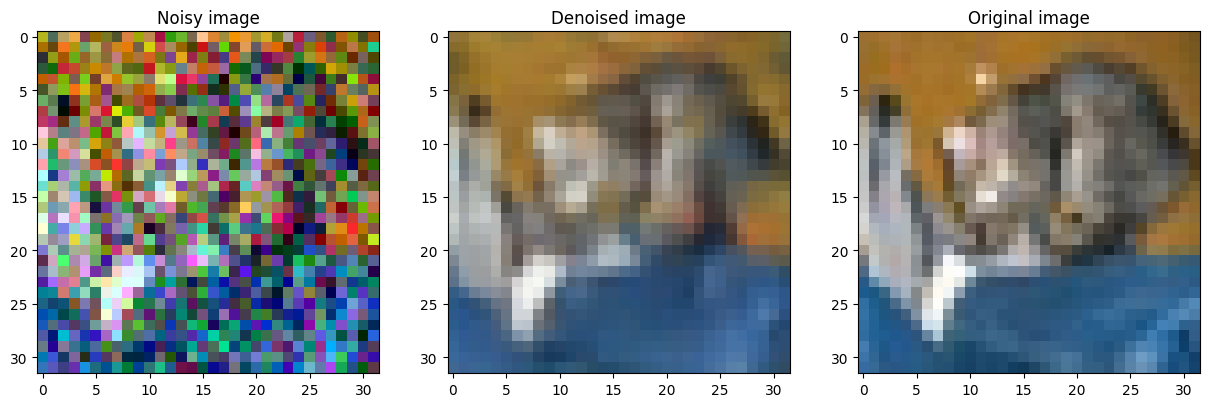

In [12]:
denoisingbranching_convNN_spatial_K_N_24_8 = DenoisingBranching_ConvNN_2D_Spatial_K_N(channel_ratio=(24, 8))

criterion = nn.MSELoss()
optimizer = optim.Adam(denoisingbranching_convNN_spatial_K_N_24_8.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_9.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_9.test_loader, criterion)
evaluate_accuracy_psnr(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_9.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_9.test_loader)




### iv. Model Experiments for Noise = 0.95

Epoch 1, Time: 8.498204946517944, Loss: 0.14798820541833368
Epoch 2, Time: 8.197598218917847, Loss: 0.10104572960673391
Epoch 3, Time: 8.477794885635376, Loss: 0.09620724581277279
Epoch 4, Time: 8.102059841156006, Loss: 0.09381834869189641
Epoch 5, Time: 8.14591097831726, Loss: 0.09255901771738097
Epoch 6, Time: 8.135901927947998, Loss: 0.09165674344162501
Epoch 7, Time: 8.046451091766357, Loss: 0.09097417560227387
Epoch 8, Time: 8.019443273544312, Loss: 0.09047193388880977
Epoch 9, Time: 7.923505783081055, Loss: 0.09002056240540027
Epoch 10, Time: 7.975779056549072, Loss: 0.0896366926295983

 Average epoch time: 8.152265000343323
Average loss on test set: 0.09071505468362456


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 10.422913150422891


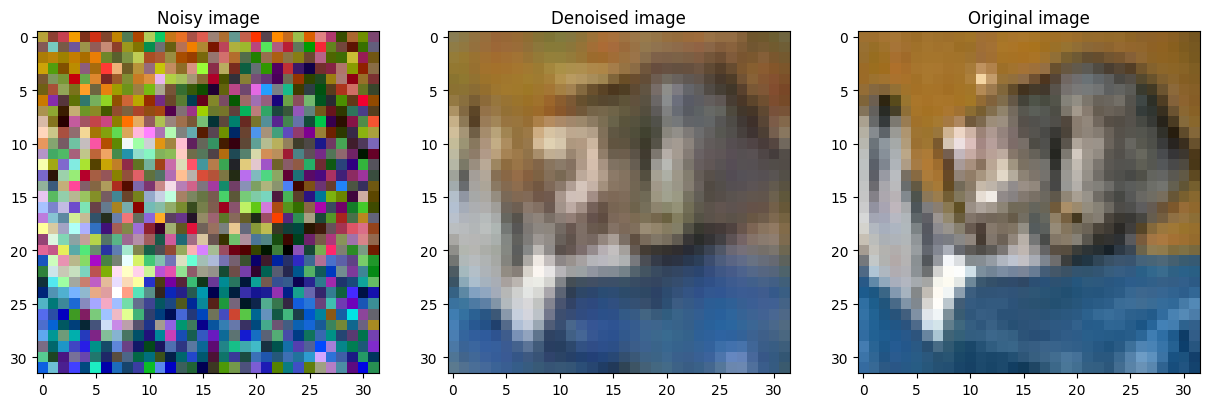

In [13]:
# CNN control model 
CNN = DenoisingCNN()

criterion = nn.MSELoss()
optimizer = optim.Adam(CNN.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(CNN, cifar10_95.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(CNN, cifar10_95.test_loader, criterion)
evaluate_accuracy_psnr(CNN, cifar10_95.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(CNN, cifar10_95.test_loader)


Epoch 1, Time: 77.68078517913818, Loss: 0.15831283801008977
Epoch 2, Time: 77.1384949684143, Loss: 0.09772682597722544
Epoch 3, Time: 77.18133783340454, Loss: 0.0922761591308562
Epoch 4, Time: 76.94756197929382, Loss: 0.08949128244920156
Epoch 5, Time: 79.33436417579651, Loss: 0.0879471650456681
Epoch 6, Time: 79.24293494224548, Loss: 0.08672977367516065
Epoch 7, Time: 79.61159205436707, Loss: 0.08589646789957495
Epoch 8, Time: 79.14440608024597, Loss: 0.08525804654144875
Epoch 9, Time: 109.57642436027527, Loss: 0.08472686658239426
Epoch 10, Time: 81.27973198890686, Loss: 0.08427524235090027

 Average epoch time: 81.7137633562088
Average loss on test set: 0.08432643034845401


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 10.739037683814955


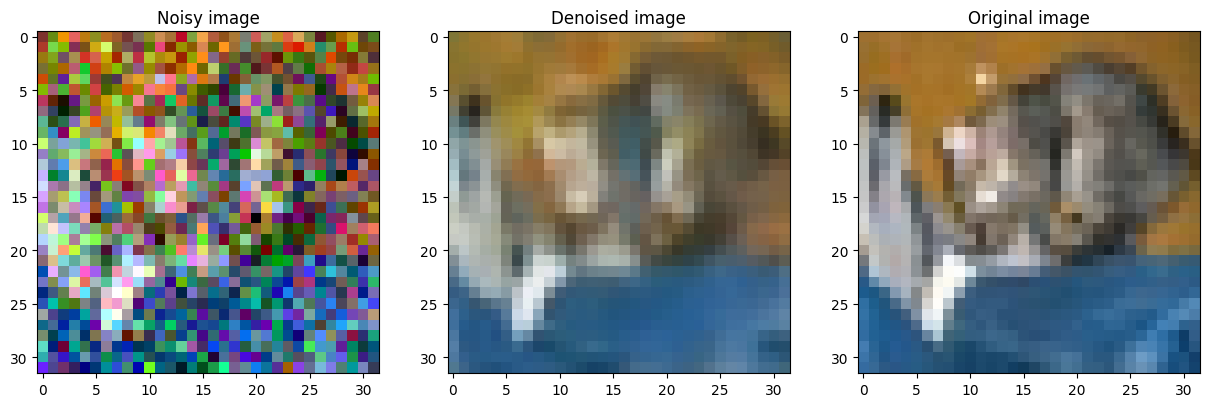

In [14]:
denoisingbranching_convNN_spatial_K_N_16_16 = DenoisingBranching_ConvNN_2D_Spatial_K_N()

criterion = nn.MSELoss()
optimizer = optim.Adam(denoisingbranching_convNN_spatial_K_N_16_16.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_95.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_95.test_loader, criterion)
evaluate_accuracy_psnr(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_95.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(denoisingbranching_convNN_spatial_K_N_16_16, cifar10_95.test_loader)




Epoch 1, Time: 76.31791377067566, Loss: 0.19209180712280677
Epoch 2, Time: 76.69997906684875, Loss: 0.09390177068960331
Epoch 3, Time: 81.97610187530518, Loss: 0.09002564923690103
Epoch 4, Time: 89.03897070884705, Loss: 0.08791058959291718
Epoch 5, Time: 76.03738927841187, Loss: 0.08664294851519873
Epoch 6, Time: 74.93077111244202, Loss: 0.08558033070410304
Epoch 7, Time: 76.66209721565247, Loss: 0.08488513372095345
Epoch 8, Time: 75.54868507385254, Loss: 0.08434505630141634
Epoch 9, Time: 76.45833492279053, Loss: 0.0838123331527652
Epoch 10, Time: 75.56153011322021, Loss: 0.0835434761079376

 Average epoch time: 77.92317731380463
Average loss on test set: 0.08503247916128985


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average PSNR on test set: 10.707117937173054


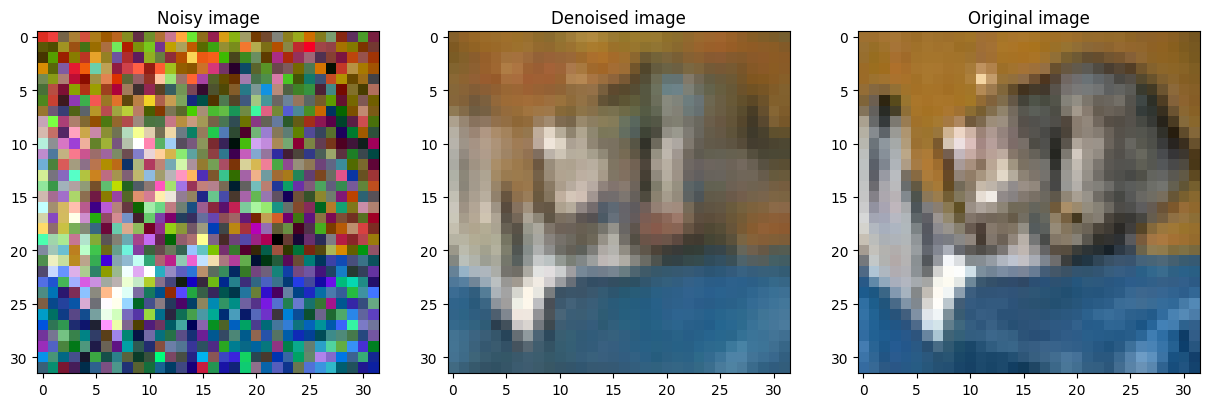

In [15]:
denoisingbranching_convNN_spatial_K_N_24_8 = DenoisingBranching_ConvNN_2D_Spatial_K_N(channel_ratio=(24,8))

criterion = nn.MSELoss()
optimizer = optim.Adam(denoisingbranching_convNN_spatial_K_N_24_8.parameters(), lr=0.001)
num_epochs = 10 
train_denoising_model(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_95.train_loader, criterion, optimizer, num_epochs)
evaluate_denoising_accuracy(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_95.test_loader, criterion)
evaluate_accuracy_psnr(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_95.test_loader, criterion)

# Print out output of trained model
test_denoise_visual(denoisingbranching_convNN_spatial_K_N_24_8, cifar10_95.test_loader)


